# Results from the CNF-isopropanol injection experiments

Carbon nanofibers (CNFs) were suspended in isopropanol at 3 mg/ml. The suspension was repeatedly injected into a chip with XL- and L-sized serpentine channels. The accumulation of CNFs inside the channel was tracked by images after each iteration. After the 5th injection (following baking and imaging) I measured the conductance (channels do not contain any resin). Experiments were conducted in Apr 2023.

In [78]:
import matplotlib.pyplot as plt
import os
from typing import Tuple

### Path where figures are saved to - change as needed

In [79]:
glob_figpath = '/home/mkrause/data/cnf_isopropanol_inject'
if not os.path.exists(glob_figpath):
    os.makedirs(glob_figpath)

## Resistance values from Excel sheet "resistance.xlsx" in `artificial_muscle\images\cnf_isopropanol_loading`

### Lists of measured electr. resistances. Values are in K$\Omega$

In [126]:
XL = [115.626, 43.4411, 695.156]
L = [1214.9, 72.4, 799.9]

## Define x- and y-labels

In [127]:
xlabel = 'Measured electrical resistance ($M\Omega$)'
ylabel = 'Resistance (K$\Omega$)'

In [128]:
def plot_box(data, title=None, xlabel=None, ylabel=None, yticklabel=None, figname=None, xlim=None) -> None:
    """Create horizontal boxplot of data"""
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0.4, right=0.8, top=0.9, bottom=0.2)
    ax.boxplot(x=data, patch_artist = True, vert = 0, widths=(0.5, 0.5))
    ax.set_title(title)
    ax.set_yticklabels(yticklabel)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        plt.xlim(xlim)
    if figname:
        figpath = os.path.join(glob_figpath, figname)
        fig.savefig(figpath)

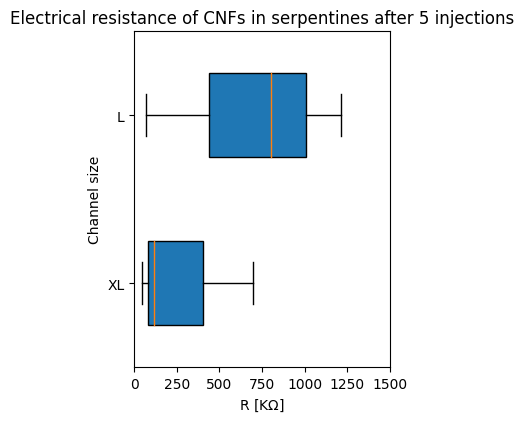

In [129]:
title = 'Electrical resistance of CNFs in serpentines after 5 injections'
xlabel = 'R [K$\Omega$]'
ylabel = 'Channel size'
yticklabel = ['XL', 'L']
figname = 'resistance_cnf_isoprop_inject.png'
xlim = [0, 1500]
plot_box(data=[XL, L], title=title, xlabel=xlabel, ylabel=ylabel, yticklabel=yticklabel, figname=figname, xlim=xlim)

## Tracking the resistance of channels after each injection cycle

In [84]:
import numpy as np

### Lists of measured electr. resistances for sizes and XL and L and their standard deviations. Values are in K$\Omega$

In [97]:
XL = [62098.33333, 749.7616667, 13369.24, 176.905, 64.275]
XL_err = [73251.39218, 577.5722407, 26465.95691, 161.8318961, 13.75911734]
L = [102226.6667, 2858.068333, 3208.798333, 140.6316667, 82.32666667]
L_err = [83636.80617, 4027.059607, 5888.752855, 52.74959997, 38.4885072]

In [121]:
def plot_hbar(data: list, err: list, xlabel: str, ylabel: str, yticklabels: str, title: str=None, figname: str=None):
    """Plot horitzontal bars with logarithmix x-axis"""
    fig, ax = plt.subplots()
    y_pos = np.arange(len(data))
    
    ax.barh(y_pos, data, xerr=err, align='center')
    ax.set_yticks(y_pos, labels=yticklabels)
    ax.invert_yaxis()  # label read top-to-bottom
    ax.set_xlabel(xlabel)
    ax.set_xlim(40, 210000)
    ax.set_ylabel(ylabel)
    ax.set_xscale('log')
    if title:
        ax.set_title(title)
    if figname:
        figpath = os.path.join(glob_figpath, figname)
        fig.savefig(figpath)

In [122]:
title = 'Channel size XL'
xlabel = 'R [K$\Omega$]'
ylabel = 'Injection number'
yticklabels = [str(i) for i in (range(2, len(XL) + 2))]
figname = 'resistance_tracking_size_XL.png'

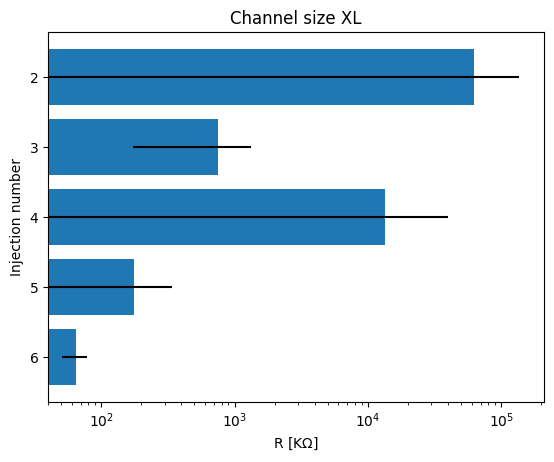

In [123]:
plot_hbar(data=XL, err=XL_err, xlabel=xlabel, ylabel=ylabel, yticklabels=yticklabels, title=title, figname=figname)

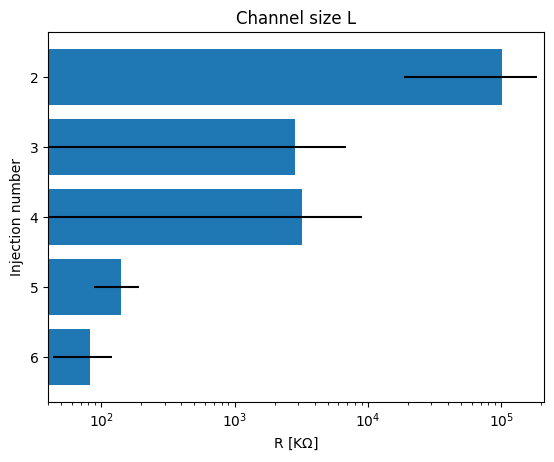

In [124]:
title = 'Channel size L'
figname = 'resistance_tracking_size_L.png'
plot_hbar(data=L, err=L_err, xlabel=xlabel, ylabel=ylabel, yticklabels=yticklabels, title=title, figname=figname)